# Цель проекта:

Отработать принцип работы с данными, чтобы распланировать кампанию на следующий год: выбрать потенциально популярный продукт и сделать на него ставку при планировании рекламной кампании.

## Описание проекта:

Изучить исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Определить критерии успешности игр. Определить актуальный период - какие жанры игр сейчас в тренде. Определить какие платформы в текущей момент приносят наибольшую выручку.

## Изучим исходные данные:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from IPython.display import display

In [2]:
# Прочтём все данные и сохраним в переменные:
df = pd.read_csv('/datasets/games.csv')

In [3]:
# Используем метод info и describe чтобы изучить информацию по исходным данным:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Вывод об исходных данных:

В исходных данных есть пропуски: пара значение пропущено в столбцах Name и Genre. Чуть больше пропусков в данных с годом выпуска игр, Year_of_Release. И около половина данных пропущено в столбцах с рейтингами: Critic_Score, User_Score, Rating. Так же неправильный тип данных для Year_of_Release - float64 и User_Score -  object.

## Подготовка данных для анализа: 

In [5]:
# Приведём названия столбцов к нижнему регистру:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# Найдём строки, в которых неизвестно название игры, и изучим их:
df[df['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


#### Резюме по пропускам в названии игр:

В 2х строках, в которых отсутствует название игры, так же отсутствует название жанра. При этом эти игры выпущенны в 1993 году и на одной и той же платформе. Так как мы не знаем название игры и их жанр, и игры выпущены около 30 лет назад, то имеет смысл их удалить из наших данных, так как нас интересует актуальные тренды в индустрии.

In [7]:
# Удалим 2 строки из данных, которые не содержат названия игры:
df = df.dropna(axis = 'index', subset = ['name'])

In [8]:
# Удалим строки из данных, которые не содержат дату выпуска игры:
df = df.dropna(axis = 'index', subset = ['year_of_release'])

In [9]:
# Заменим значения tbd в столбце user_score нулевыми значениями:
df['user_score'] = df['user_score'].replace('tbd', 0)

In [10]:
# Преобразуем тип данных для двух столбцов:
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')

In [11]:
# Посчитаем суммарные продажи во всех регионах и сохраним их в столбец total_sales:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Вывод:

Мы обработали исходные данные и подготовили их к дальнейшему анализу. Пропуски в данных могли появиться при неправильной выгрузке данных, либо при недостаточном количестве информации для определения рейтинга. Пропуски в столбце rating, который отражает возратной рейтинг ESRB для игры, заполнять не стал, так как для этого необходим соответствующий уровень экспертизы, чтобы определить к какому возрастному цензу отсится та или иная игра.

1. Привели название столбцов к нижнему регистру. 
2. Удалили из данных 2 строки, в которых невозможно установить название и жанр игрыю. 
3. Удалили строки с пропусками в столбце year_of_release, так как мы не знаем года выпуска игры, и привели к данный столбец к целочисленному типу данных. 
4. Значения tbd в столбце user_score говорит нам о том, что рейтинг будет определён позже, при этом данное значение встречается для игр, которые были выпущены более 10 лет назад. В связи с этим я принял решение заменить tbd на нулевые значения.
5. Привели значения в столбце user_score к дробному типу данных.
7. Посчитали суммарную выручку от продаж во всех регионах.

## Исследовательский анализ данных:

Сгруппируем наши данные по году выпуска, посчитаем количество выпущенных игр в каждом году и
построим график, чтобы оценить тендецию развития игровой индустрии:

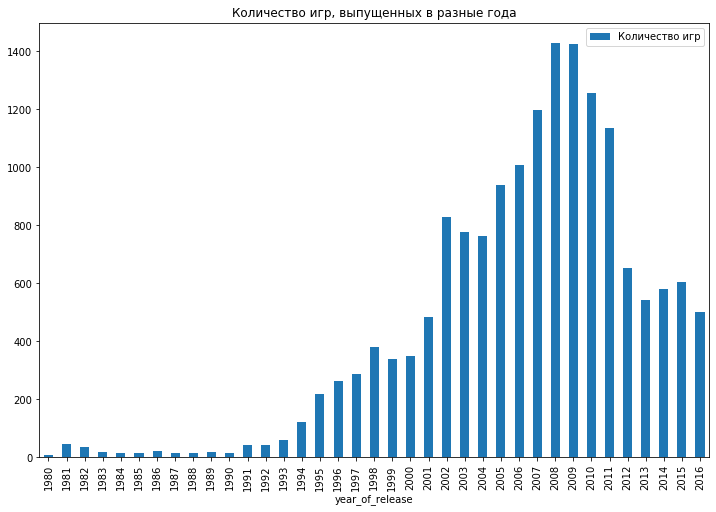

In [12]:
df.pivot_table(index = ['year_of_release'], values = 'name', aggfunc = 'count').reset_index().plot(
    x = 'year_of_release',
    y = 'name',
    kind = 'bar',
    figsize = (12, 8),
    title = 'Количество игр, выпущенных в разные года',
)
plt.legend(['Количество игр'])

#### Вывод о тенденциях в игровой индустрии:

Согласно гистограмме выше, наглядно видно, что после 2011 года заметен спад в игровой индустрии в части падения количества выпускаемых игр на всех платформах. Поэтому, чтобы результат нашего проекта был актуальным, необходимо рассматривать данные начиная с 2012 года, когда начался сильный спад в выпуске новых игр.

In [13]:
# Сохраним в отдельную таблицу Топ 10 платформ по выручке со всех игр за все года:
top10_in_sales = df.pivot_table(
    index = ['platform'], values = 'total_sales', aggfunc = 'sum')\
    .sort_values(by='total_sales', ascending=False)\
    .reset_index().loc[0:9]
print(top10_in_sales)

  platform  total_sales
0      PS2      1233.56
1     X360       961.24
2      PS3       931.34
3      Wii       891.18
4       DS       802.78
5       PS       727.58
6      PS4       314.14
7      GBA       312.88
8      PSP       289.53
9      3DS       257.81


In [14]:
# Сохраним Топ 10 платформ  в отдельный список:
list_of_top10_platform = top10_in_sales['platform'].tolist()

In [15]:
# Группирую наши данные в сводную таблицу, где для каждой платформы из Топ 10,
# укажем общую сумму продаж по всем играм в каждый конкретный год.
# Пропуски в новой сводной таблице заполним нулевыми значениями.
top10_by_years = df[df['platform'].isin(list_of_top10_platform)].pivot_table(
    index = ['year_of_release'], columns = 'platform', values = 'total_sales', aggfunc = 'sum'
).fillna(0).reset_index()

Посмотрим распределение по суммарным продажам всех игр в каждый конкретный год для каждой платформы из Топ10:

[Text(0, 0.5, 'game_sales_in_millions_copies')]

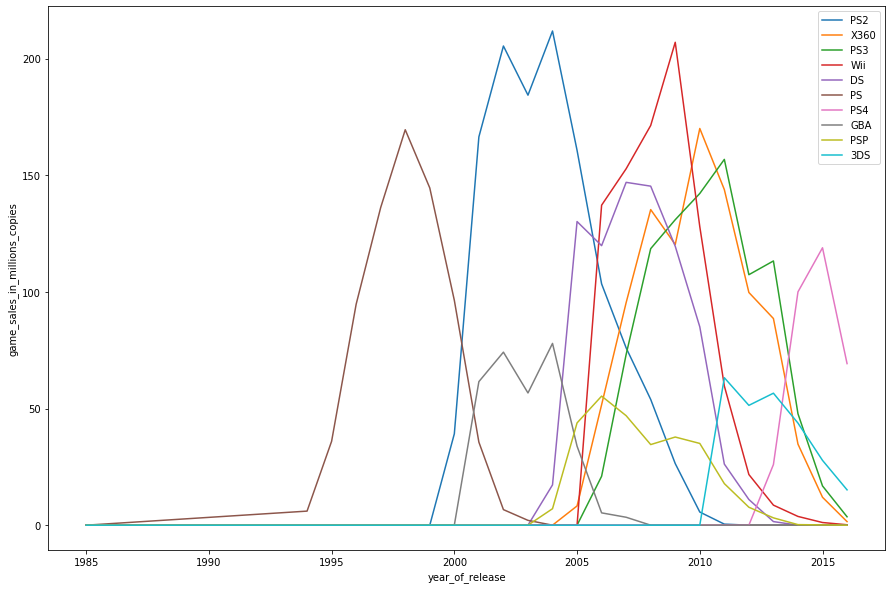

In [16]:
fig, ax = plt.subplots(figsize = (15, 10))
for platform in list_of_top10_platform:
    sns.lineplot(data=top10_by_years, x='year_of_release', y=platform, ax=ax, legend='brief', label=str(platform))
ax.set(ylabel='game_sales_in_millions_copies')

#### Вывод о сроках жизни игровых платформ:

Как видно из графиков выше, приблизительный срок жизни игровой платформы составляет 7-8 лет. На примере Play Station (PS, PS2, PS3, PS4) хорошо заметно, что каждое новое поколение игровой пристивки появляется, приблизительно, через 7 лет.

#### Выбираем актуальный период, который отражает текущую ситуацию в игровой индустрии:

В качестве актуального периода возьмем данные, с 2012 года и до 2016 года. И далее будем работать с ними.

In [17]:
# Сделаем срез, чтобы в нашей таблице была информация об играх, выпущенных в 2012 году и позже:
df = df.query('2012 <= year_of_release < 2016 ')

#### Поиск потенциально прибыльных платформ:

In [18]:
# Сохраним в отдельную таблицу Топ 10 платформ по выручке со всех игр за 2012-2015 года:
top10_in_sales = df.pivot_table(
    index = ['platform'], values = 'total_sales', aggfunc = 'sum')\
    .sort_values(by='total_sales', ascending=False)\
    .reset_index().loc[0:9]
print(top10_in_sales)

  platform  total_sales
0      PS3       285.19
1      PS4       244.89
2     X360       235.02
3      3DS       179.47
4     XOne       133.17
5     WiiU        77.59
6       PC        57.40
7      PSV        44.93
8      Wii        35.19
9       DS        12.55


In [19]:
# Сохраним Топ 10 платформ  в отдельный список:
list_of_top10_platform = top10_in_sales['platform'].tolist()

In [20]:
# Группирую наши данные в сводную таблицу, где для каждой платформы из Топ 10,
# укажем общую сумму с продаж по всем играм в каждый конкретный год.
# Пропуски в новой сводной таблице заполним нулевыми значениями.
top10_by_years = df[df['platform'].isin(list_of_top10_platform)].pivot_table(
    index = ['year_of_release'], columns = 'platform', values = 'total_sales', aggfunc = 'sum'
).fillna(0).reset_index()

Посмотрим распределение по суммарным продажам всех игр в каждый конкретный год в период с 2012 по 2016 для каждой платформы из Топ10:

[Text(0, 0.5, 'game_sales_in_millions_dollars ')]

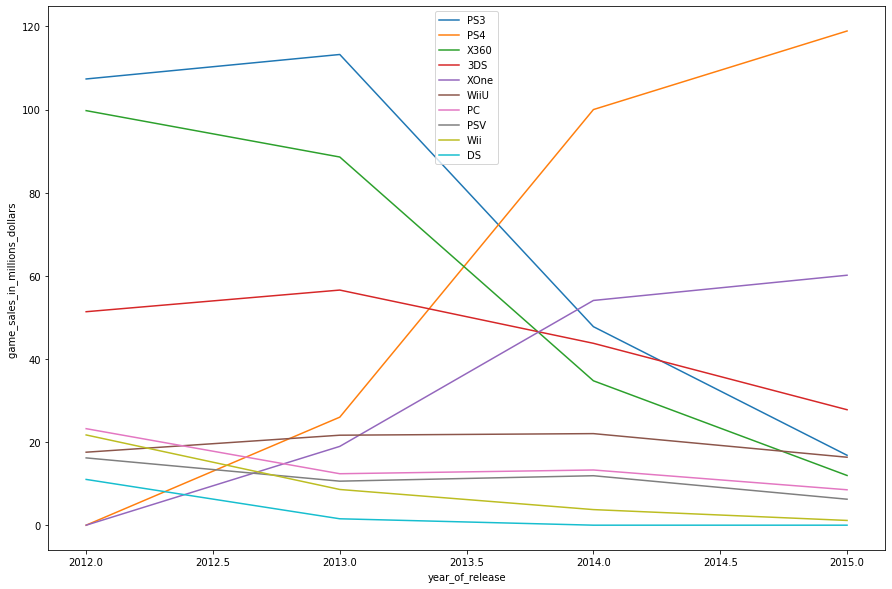

In [21]:
fig, ax = plt.subplots(figsize = (15, 10))
for platform in list_of_top10_platform:
    sns.lineplot(data=top10_by_years, x='year_of_release', y=platform, ax=ax, legend='brief', label=str(platform))
ax.set(ylabel='game_sales_in_millions_dollars ')

##### Вывод о лидерах среди игровых платформ по продажам игр:

В период с 2012 по 2016 у 8 из 10 игровых платформ суммарные продажи игр снижаются, и только для двух платформ: PS4 и Xbox One, растут продажи игр. Упор в продажах надо делать именно на эти две платформы.

#### Графики boxplot для каждой платформы по продажам игр в период с 2012 по 2016:

Text(0.5, 1.0, 'Графики boxplot для каждой платформы по продажам игр в период с 2012 по 2016')

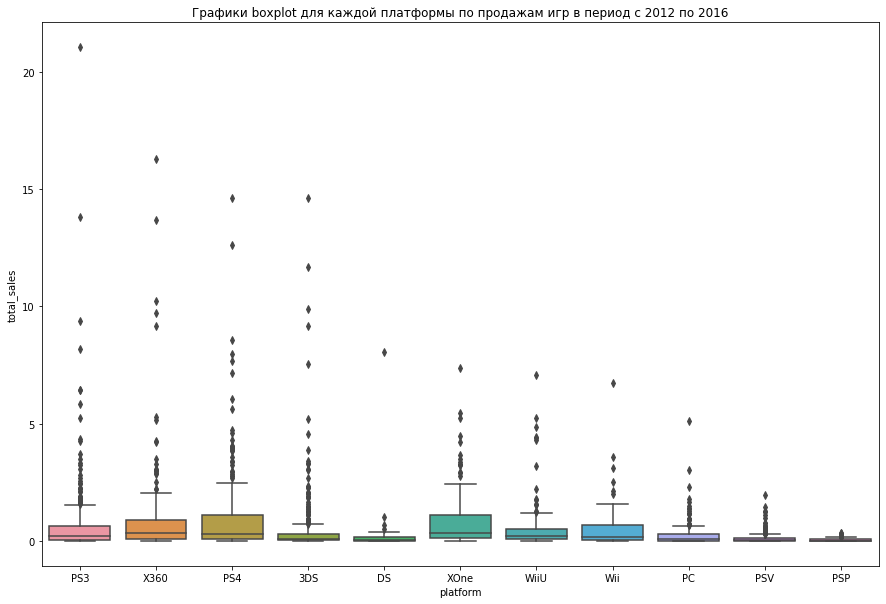

In [22]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data=df, x='platform', y='total_sales')
ax.set_title('Графики boxplot для каждой платформы по продажам игр в период с 2012 по 2016')

(0, 2.5)

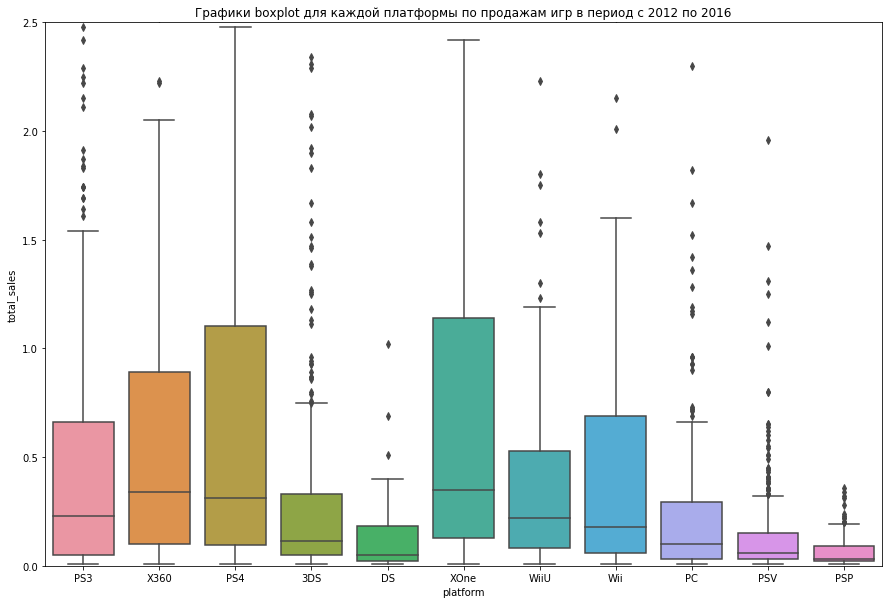

In [23]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data=df, x='platform', y='total_sales')
ax.set_title('Графики boxplot для каждой платформы по продажам игр в период с 2012 по 2016')
plt.ylim([0,2.5])

##### Вывод:

Чем современнее игровая приставка, тем дороже для неё стоят игры и тем выше общие суммы продаж с игр. Две самые современные приставки PS4 и XboxOne приблизительно одинаковы по продажам игр, при этом для PS4 наблюдаются большие по размерам выбросы, возможно, это связано более дорогими экслюзивными играми для этой платформы. Примечательно, что прошлое поколение приставки от Microsoft - Xbox360, не так сильно различается от новой приставки от Sony - PS4 по суммам продаж с игр - медианный значения и во все приблизительно равны.

#### Зависимость продаж игр для PS4 от отзывов пользователей и от рейтинга критиков:

In [24]:
# Сделаем срез из наших данных и выберем все данные для PS4:
df_ps4 = df.query('platform == "PS4" and user_score != 0')

Корреляция между продажами и рейтингом критиков 0.4318482049982005


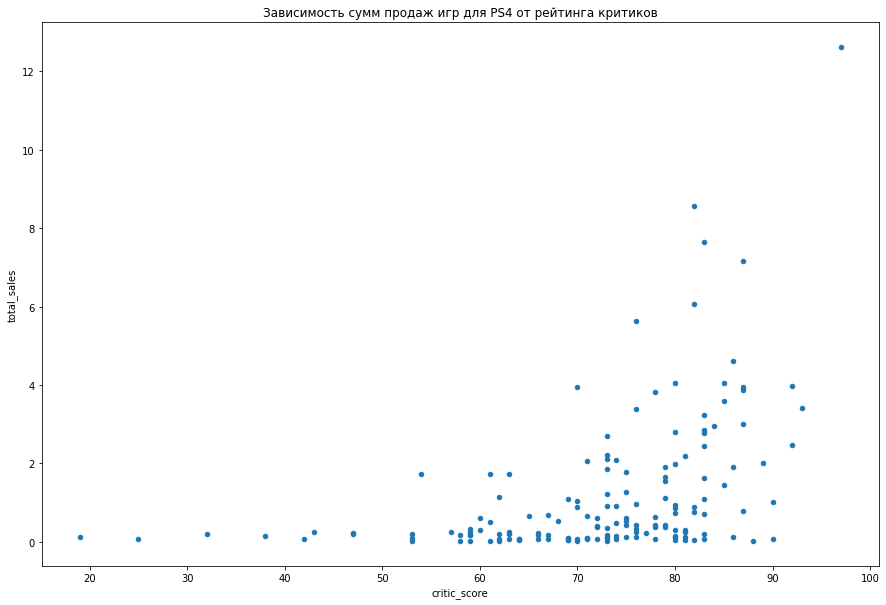

In [25]:
df_ps4.plot(x='critic_score', y='total_sales', kind='scatter', figsize = (15, 10), 
            title='Зависимость сумм продаж игр для PS4 от рейтинга критиков')
print('Корреляция между продажами и рейтингом критиков', df_ps4['total_sales'].corr(df_ps4['critic_score']))

Корреляция между продажами и отзывами пользователей 0.024230832360622553


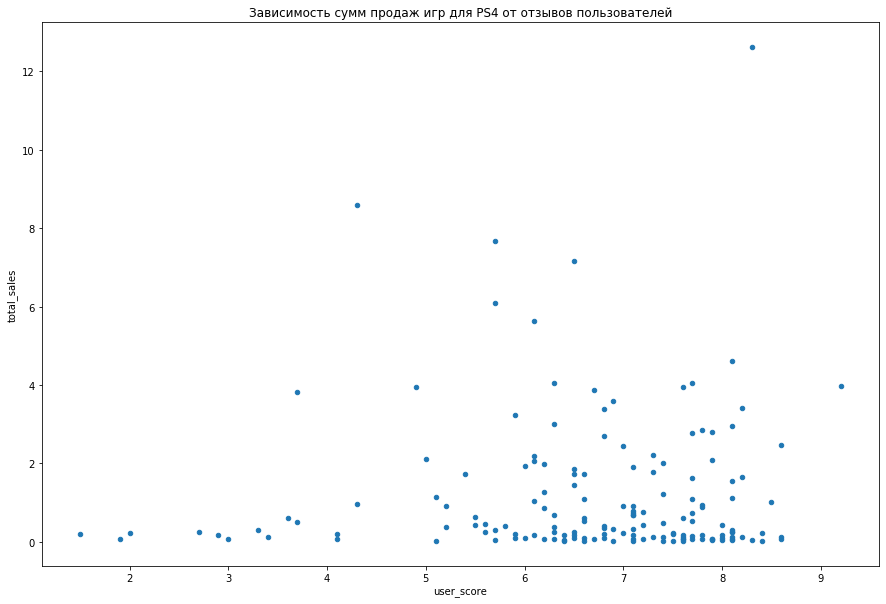

In [26]:
df_ps4.plot(x='user_score', y='total_sales', kind='scatter', figsize = (15, 10), 
            title='Зависимость сумм продаж игр для PS4 от отзывов пользователей')
print('Корреляция между продажами и отзывами пользователей', df_ps4['total_sales'].corr(df_ps4['user_score']))

##### Вывод:

 Мы наблюдаем средню корреляцию между продажами и рейтингом критиков (0.43) и слабую корреляцию между продажами и отзывами пользователей (0.024). Отзывы пользователей практически не влиют на уровень продаж. В то время как на рейтинг критиков намного чаще обращают внимание, чем на отзывы пользователей.

#### Проверим зависимость, которая была выявлена для PS4, для остальных платформ:

In [27]:
# Сохраним во временную таблицу необходимы нам данные:
df_temp = df[['platform', 'critic_score', 'user_score', 'total_sales']]
# Извлечем список с уникальными названиями платформ и сохраним в переменную его длину:
list_temp = df_temp['platform'].unique()
len_of_list_temp = len(list_temp)

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


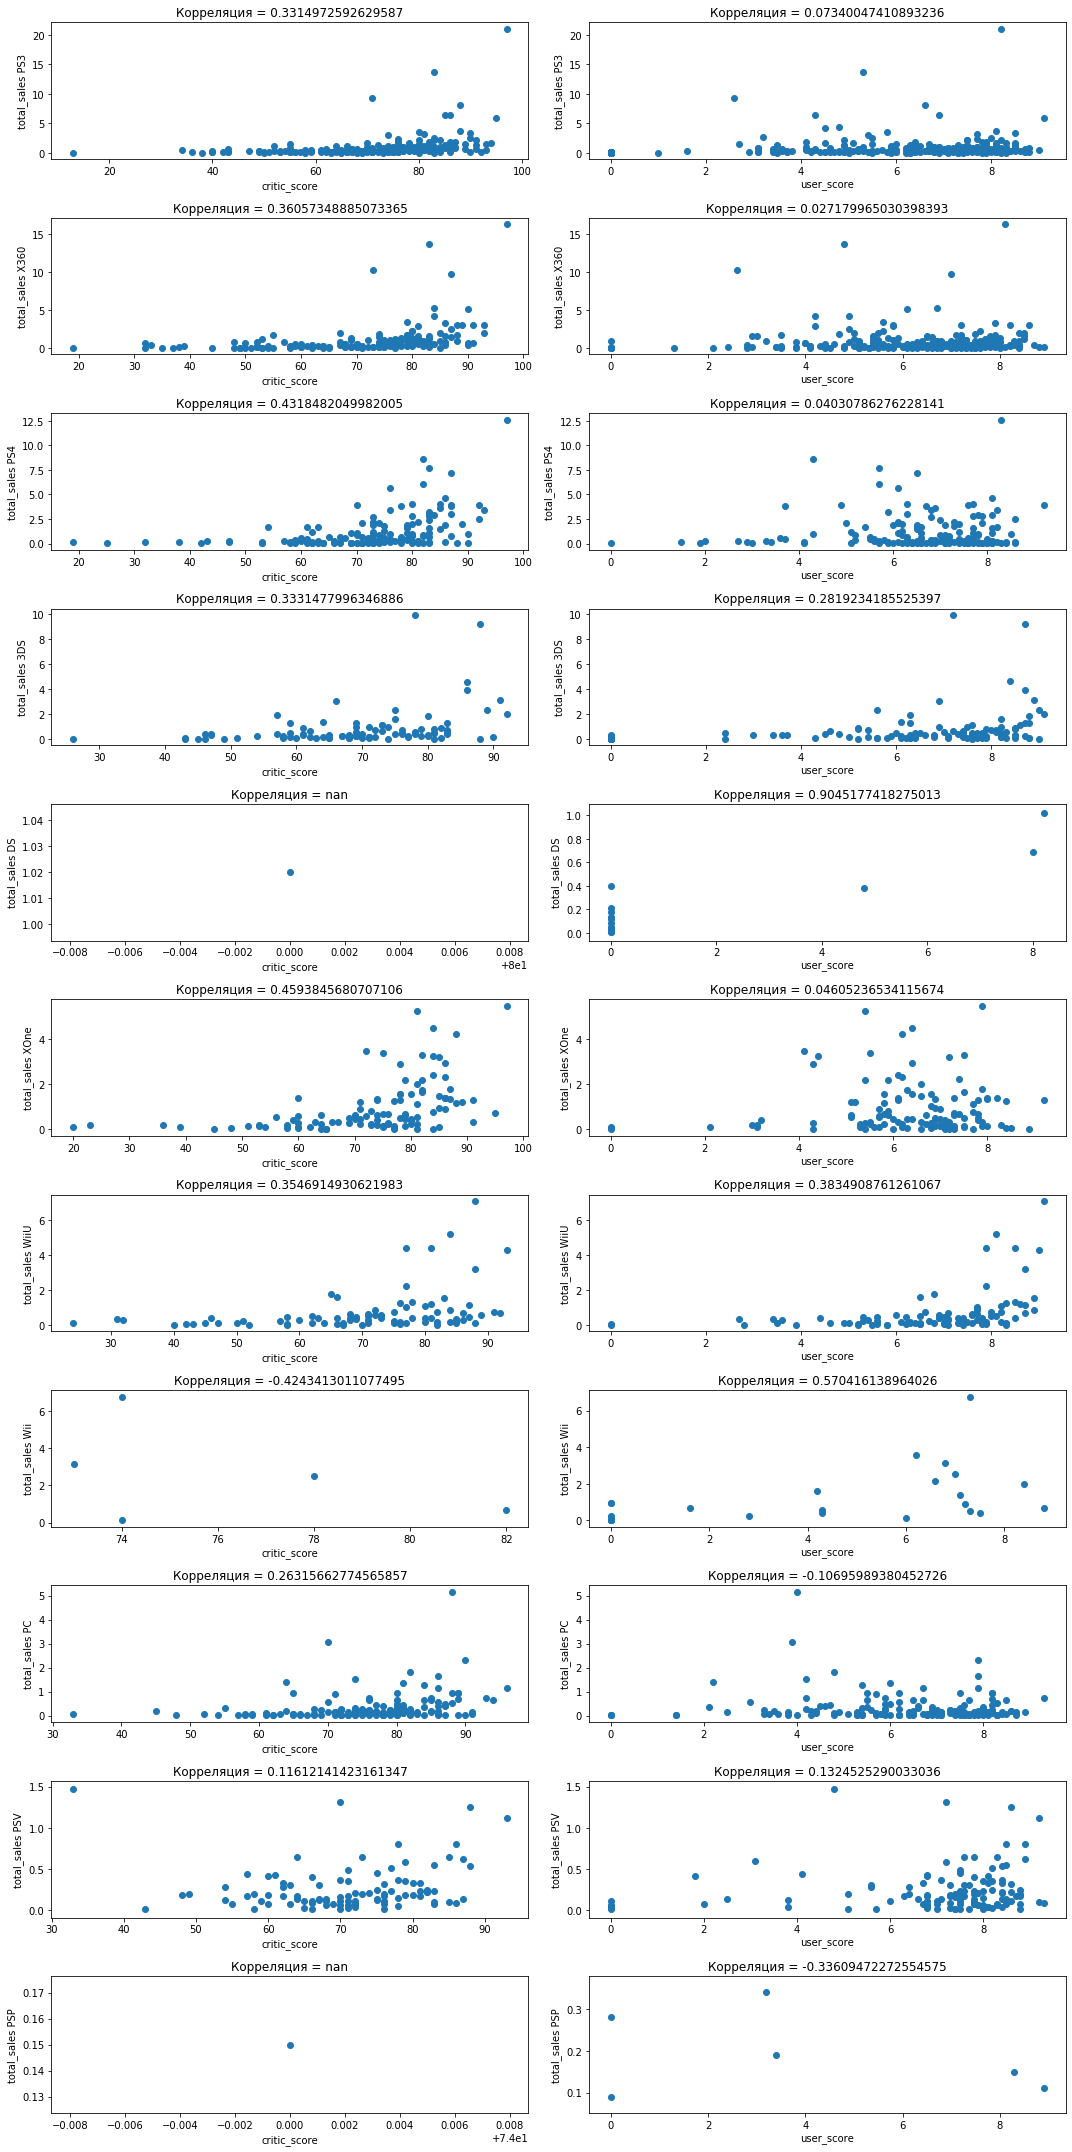

In [28]:
# Построим точечный график для каждый из платформ и посчитаем корреляцию между продажами
# и рейтингом критиков и оценками пользователей:
fig, axes = plt.subplots(nrows = 11, ncols = 2, figsize=(15, 30))

for i in range(len_of_list_temp):
    corr_1 = df_temp[df_temp['platform'] == list_temp[i]]['total_sales'].\
    corr(df_temp[df_temp['platform'] == list_temp[i]]['critic_score'])
    
    axes[i,0].set_ylabel('total_sales ' + list_temp[i])
    axes[i,0].set_xlabel('critic_score')
    axes[i,0].set_title('Корреляция = ' + str(corr_1))
    axes[i,0].scatter(data = df_temp[df_temp['platform'] == list_temp[i]], x='critic_score', y='total_sales')
    
    corr_2 = df_temp[df_temp['platform'] == list_temp[i]]['total_sales'].\
    corr(df_temp[df_temp['platform'] == list_temp[i]]['user_score'])
    
    axes[i,1].set_ylabel('total_sales ' + list_temp[i])
    axes[i,1].set_xlabel('user_score')
    axes[i,1].set_title('Корреляция = ' + str(corr_2))
    axes[i,1].scatter(data = df_temp[df_temp['platform'] == list_temp[i]], x='user_score', y='total_sales')
                
fig.tight_layout()

##### Вывод:

Напомню, что в отедльном исследовании для платформы PS4 мы установили, что отзывы пользователей практически не оказывают влияние на продажи игр, а рейтинги критиков имееют средний уровень корреляции с продажами. При исследовании всех платформ в период с 2012 по 2016 года, можно сделать следующие выводы:

1) Так какая же тенденция, как и для PS4, наблюдается для следующих платформ: PS3, PS4, Xbox360, XboxOne, PSP.
2) Рейтинги критиков и оценки пользователей одинаково влияют на продажи игр для следующих платформ: 
    PSV, Wii, WiiU, DS, 3DS.
3) Отдельным особняком стоя компьютерные игры, PC: Если зависимость между рейтингом критиков и продажами сохраняется, то отзывы пользователей имееют отризательную зависимость с продажами.

In [51]:
# Комментарий от ревьюера 2

df_temp122 = df[['platform', 'critic_score', 'user_score', 'total_sales']]
df_temp122.query('platform == "PSP"')

,platform,critic_score,user_score,total_sales
5300,PSP,NaN,3.2,0.34
7875,PSP,NaN,3.4,0.19
8969,PSP,74.0,8.3,0.15
10024,PSP,NaN,8.9,0.11


#### Оценим распределение игр по жанрам:

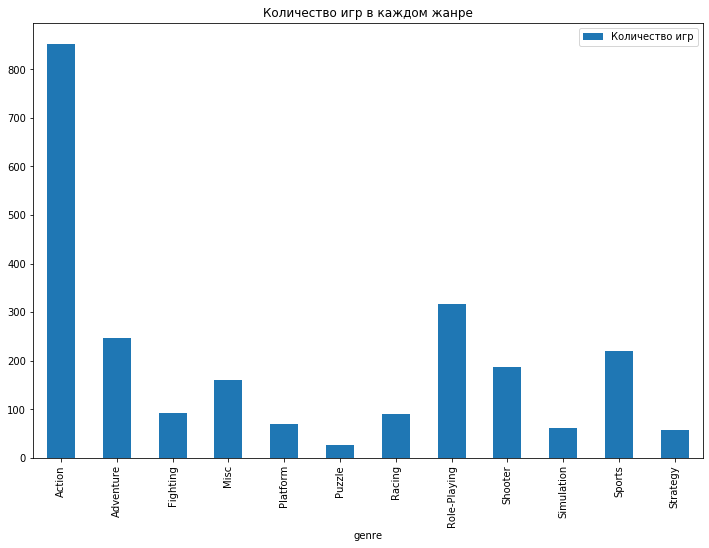

In [29]:
# Сгруппируем наши данные по жанру, посчитаем количество выпущенных игр в каждом жанре и
# построим график, чтобы оценить наглядно:
df.pivot_table(index = ['genre'], values = 'name', aggfunc = 'count').reset_index().plot(
    x = 'genre',
    y = 'name',
    kind = 'bar',
    figsize = (12, 8),
    title = 'Количество игр в каждом жанре',
)
plt.legend(['Количество игр'])

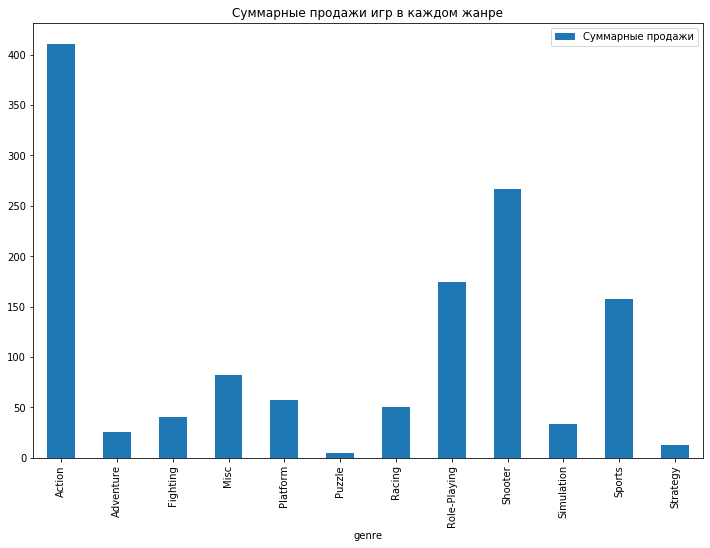

In [30]:
# Сгруппируем наши данные по жанру, посчитаем суммарные продажи игр в каждом жанре и
# построим график, чтобы оценить наглядно:
df.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = 'sum').reset_index().plot(
    x = 'genre',
    y = 'total_sales',
    kind = 'bar',
    figsize = (12, 8),
    title = 'Суммарные продажи игр в каждом жанре',
)
plt.legend(['Суммарные продажи'])

In [31]:
# Сгруппируем во временную таблицу наши данные по жанру, посчитаем количество выпущенных игр и суммарные продажи:
df_temp = df.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = ['count', 'sum']).reset_index()

# Избавимся от мультиндексов в столбцах:
df_temp.columns = df_temp.columns.droplevel(1)

# Посчитаем продажи на одну выпущенную игру в жанре, отсортируем и выведем на экран:
df_temp['sales_per_game'] = df_temp['sum'] / df_temp['count']
display(df_temp.sort_values('sales_per_game', ascending=False))

,genre,count,sum,sales_per_game
8,Shooter,188,266.51,1.417606
4,Platform,70,57.77,0.825286
10,Sports,220,157.58,0.716273
6,Racing,91,50.71,0.557253
7,Role-Playing,316,174.62,0.552595
9,Simulation,62,33.23,0.535968
3,Misc,160,82.44,0.515250
0,Action,853,411.01,0.481841
2,Fighting,93,40.02,0.430323
11,Strategy,58,12.21,0.210517


##### Вывод:

Большего всего выпускают игры в жанре Action и в этом же жанре самые большие суммарные продажи. Меньше всего игр и продаж в жанре Puzzle. При этом самыми прибыльными считаются игры в жанре Shooter: практически в 3 раза лучше продажи на каждую выпущенную игру, по сравнению с играми в жанре Action.

### Вывод:

В ходе нашего исследовательского анализа данных мы установили, что начиная с 2012 выпуск новых игры сократился. Поэтому в качестве актуального периода выбрали с 2012 по 2016 года. За этот период продажи растут только у двух самых современных игровых платформ: PS4 и Xbox One. Продажи для PS4 выше, несмотря на то, что медианное значение продаж между PS4 и Xbox One, практически одинаковое - видимо, у PS4 дороже и качественне эксклюзивные игры для их платформы. Для этих двух плафтформ на продажи никак не влияют отзывы пользователей, при этом обращают внимание на оценки критиков для игры - наблюдается средней уровень корреляции между продажами и рейтингами критиков. Интересную зависимость обнаружили для компьютерных игр: наблюдается отрицательная корреляция между продажами и отзывами пользоавателями. Так же установили самый прибыльный жанр для продаж, таким жанром оказался - Shooter: практически в 2 раза лучше продаются игры этого жанра.

## Портрет пользователя каждого региона:

In [32]:
# Сгруппироуем данные по платформам и посчитаем суммарные продажи в каждом регионе:
df_platform_per_region = df.pivot_table(index = ['platform'],\
                               values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')

In [33]:
# Сохраним в отдельные таблицы Топ 5 платформ по продажам в каждом регионе, отсортированные по убыванию:
df_platform_for_eu = df_platform_per_region.sort_values('eu_sales', ascending=False).head().reset_index()
df_platform_for_na = df_platform_per_region.sort_values('na_sales', ascending=False).head().reset_index()
df_platform_for_jp = df_platform_per_region.sort_values('jp_sales', ascending=False).head().reset_index()

In [34]:
# Сгруппироуем данные по жанрам игр и посчитаем суммарные продажи в каждом регионе:
df_genre_per_region = df.pivot_table(index = ['genre'],\
                               values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')

In [35]:
# Сохраним в отдельные таблицы Топ 5 жанров игр по продажам в каждом регионе, отсортированные по убыванию:
df_genre_for_eu = df_genre_per_region.sort_values('eu_sales', ascending=False).head().reset_index()
df_genre_for_na = df_genre_per_region.sort_values('na_sales', ascending=False).head().reset_index()
df_genre_for_jp = df_genre_per_region.sort_values('jp_sales', ascending=False).head().reset_index()

In [36]:
# Сгруппироуем данные по рейтингу ESRB и посчитаем суммарные продажи в каждом регионе:
df_rating_per_region = df.pivot_table(index = ['rating'],\
                               values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').reset_index()

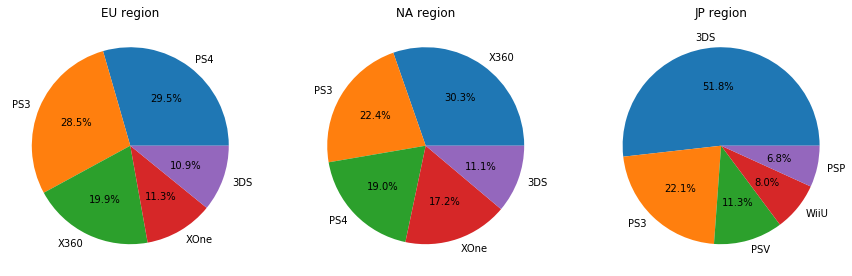

In [37]:
# Построим круговые диаграммы по продажам по платформам в зависимости от региона:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 10))

ax1.pie(df_platform_for_eu['eu_sales'], autopct="%.1f%%", labels=df_platform_for_eu['platform'])
ax1.set_title('EU region')
ax2.pie(df_platform_for_na['na_sales'], autopct="%.1f%%", labels=df_platform_for_na['platform'])
ax2.set_title('NA region')
ax3.pie(df_platform_for_jp['jp_sales'], autopct="%.1f%%", labels=df_platform_for_jp['platform'])
ax3.set_title('JP region')

plt.show()

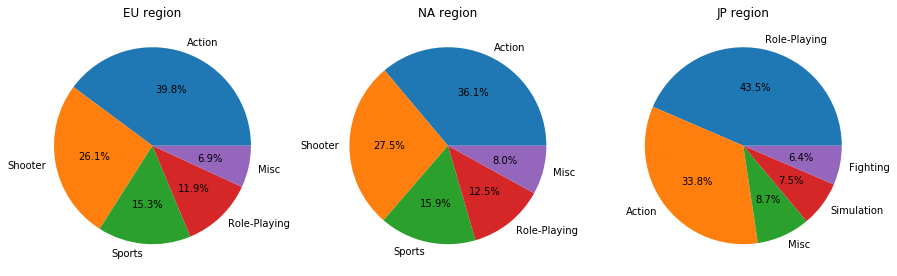

In [38]:
# Построим круговые диаграммы по продажам по жанрам игр в зависимости от региона:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 10))

ax1.pie(df_genre_for_eu['eu_sales'], autopct="%.1f%%", labels=df_genre_for_eu['genre'])
ax1.set_title('EU region')
ax2.pie(df_genre_for_na['na_sales'], autopct="%.1f%%", labels=df_genre_for_na['genre'])
ax2.set_title('NA region')
ax3.pie(df_genre_for_jp['jp_sales'], autopct="%.1f%%", labels=df_genre_for_jp['genre'])
ax3.set_title('JP region')

plt.show()

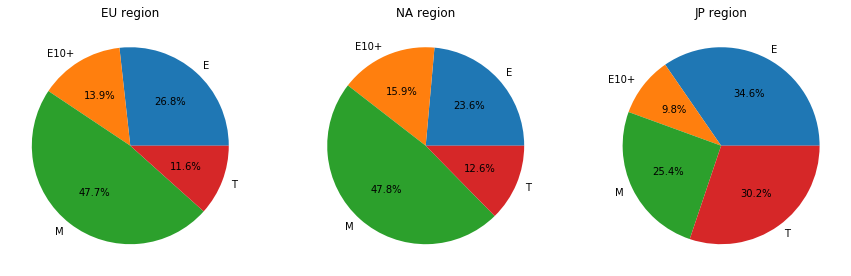

In [39]:
# Построим круговые диаграммы по продажам по рейтингу ESRB в зависимости от региона:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 10))

ax1.pie(df_rating_per_region['eu_sales'], autopct="%.1f%%", labels=df_rating_per_region['rating'])
ax1.set_title('EU region')
ax2.pie(df_rating_per_region['na_sales'], autopct="%.1f%%", labels=df_rating_per_region['rating'])
ax2.set_title('NA region')
ax3.pie(df_rating_per_region['jp_sales'], autopct="%.1f%%", labels=df_rating_per_region['rating'])
ax3.set_title('JP region')

plt.show()

### Вывод:

Из полученных выше круговых диаграмм можно сделать следующие выводы:

1) По игровым платформам:   
- В Европе 2/3 пользователей предпочитают платформу PS. На PS3 и PS4 приходится, практически 60% продаж из Топ 5  платформ.
- В Северной Амрике основные пользователи разделились между платформами PS(41,5%) и Xbox(48%).
- В Японии картина сильно другая: платформа Xbox не представлена в Топ 5, и где то 1/5 приходится на платформу PS3. При этом половина пользователей предпочитает игры на платформе 3DS.

2) По игровым жанрам:   
- Европа и Северная Америка по выбору игровых жанров полностью идентичны.
- В Японии картина снова сильно отличается, более 40% пользователей предпочитает в жанре Role-Playing, в то время как в Европе и Северной Америке таких пользователей около 12%.

3) По рейтингу ESRB: 
- Половина пользователей из Европы и Северной Америке предпочитают игры для взрослых, а в Японии таких только четверть.
- В Японии более молодые пользователи, так как треть пользователей покупает игры для подростков. В Европе и Северной Америке игры для подростков занимают около 12% от всех продаж для платформ из Топ 5.
- При это для всех регионов наблюдается одинаковый отсительный уровень продаж в категории игр Е10

## Проверка гипотез:

### Формулируем нулевые гипотезы:

Нулевая гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC равны.
Нулевая гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports равны.

### Формулируем альтернативные гипотезы:

Альетрнативная гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC различаются. Альетрнативная гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [55]:
df.query('critic_score.notna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16510,Art Academy: Home Studio,WiiU,2015,Misc,0.00,0.00,0.01,0.00,82.0,8.3,E,0.01
16584,Transformers: Fall of Cybertron,PC,2012,Action,0.01,0.00,0.00,0.00,78.0,7.9,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01


In [40]:
# Сделаем срез из наших данных и уберём из таблицы строчки, где user_score = 0:
df['user_score'] = df['user_score'].fillna(0)
df = df.query('user_score != 0')

In [41]:
# Посчитаем дисперсии для наших выборок, чтобы понять, какой парамтр указывать для equal_var при использовании Т теста:
variance = np.var(df[df['platform'] == 'PC']['user_score'])
print('Дисперсия для user_score с игровой платформы PC =', variance)

variance = np.var(df[df['platform'] == 'XOne']['user_score'])
print('Дисперсия для user_score с игровой платформы XOne =', variance)

Дисперсия для user_score с игровой платформы PC = 2.694069673237915
Дисперсия для user_score с игровой платформы XOne = 1.6451872770511302


In [42]:
alpha = 0.05 # критический уровень статистической значимости

In [43]:
# Применим Т-тест 
results_1 = st.ttest_ind(df[df['platform'] == 'PC']['user_score'], df[df['platform'] == 'XOne']['user_score'])

In [44]:
print('p-значение:', results_1.pvalue)

if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9463196313131612
Не получилось отвергнуть нулевую гипотезу


In [45]:
# Посчитаем дисперсии для наших выборок, чтобы понять, какой парамтр указывать для equal_var при использовании Т теста:
variance = np.var(df[df['genre'] == 'Action']['user_score'])
print('Дисперсия для user_score с игровой платформы PC =', variance)

variance = np.var(df[df['genre'] == 'Sports']['user_score'])
print('Дисперсия для user_score с игровой платформы XOne =', variance)

Дисперсия для user_score с игровой платформы PC = 1.8276259877817393
Дисперсия для user_score с игровой платформы XOne = 2.762749959942316


In [46]:
# Применим Т-тест 
results_2 = st.ttest_ind(df[df['genre'] == 'Action']['user_score'], df[df['genre'] == 'Sports']['user_score'])

In [47]:
print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3744684534520844e-23
Отвергаем нулевую гипотезу


### Вывод:

Дисперсии всех выборок для наших двух гипотез оказались близки, так как все исследуемые нами генеральные совокупности (user_score) имеют значения в пределах от 0 до 10. Поэтому параметр equal_var для Т теста оставим по умолчанию True. t-критерий Стьюдента использовали потому что данный критерий как раз применяют к оценке равенства средних. В итоге мы получили следуюущие результаты проверок наших гипотез:
1) Средние пользовательские рейтинги платформ Xbox One и PC равны.
2) Средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод по проекту:

Целью нашего проекта было найти популярные игровые платформы и жанры, чтобы спланировать продажи и рекламную кампанию на 2017 год. В ходе исследования мы установили, что начиная с 2012 года среди 10 самых популярных платформ, продажи игр растут только у двух - PS4 и XboxOne. При этом, не смотря на большое количество игр и продаж в жанре Action, этот жанр не является самым прибыльным. Самым прибыльным оказался жанр Shooter, а за ним идут Platform и Sports. Так же мы оценили какие игры предпочитают в каждом из регионов. В соответствии с этим в Европе и Северной Америке необходимо сфокусировать рекламную кампанию и продажи для двух платформ PS4 и XboxOne и на двуж жанрах Shooter и Sports. При этом для не стоит обходить вниманием жанр Action в Европе и Северной Америке, так как на него приходится почти 40% продаж. Для достижения наибольшего эффекта рекламной кампнаии в этом жанре, необходимо будет выбрать самые ожидаемые и имеющие высокий рейтинг критиков игры, и включить эти игры в реклаамную кампанию. В азиатском регионе, в частности Японии, стоит составить отдельный план продаж и рекламной кампании, так как этот регион сильно отличается по игровым платформам и продаваемым играм. Например PS4 и XboxOne не входят в топ5 игровых платформ по продажам в этом регионе, лидирует 3DS, а на втором месте прошлое поколение приставки от Sony - PS3. При этом есть все основания полагать, что скоро будет выпущена новое поколение приставки 3DS, так как срок жизни этой подходит к концу: продажи для неё начались в 2010 году, и в данные момент продажи падают, а средний срок жизни одного поколения игровых платформ 7-8 лет. В связи с этим рекламную кампанию в данном регионе надо подстроить под игровые жанры Role-Playing и Action. А по игровым платформам: сфокусировать на текущем поколении 3DS и ожидать появления нового поколения этой платформы, + расширить рекламную платформу и продажи на PS4, так как, скорее всего, в ближайшем будущем продажи для PS3 будут перетекать в продажи для PS4.